## Experimentos numéricos en Óptica de Fourier

La mayor parte de este noetebook está basada en el tutorial [Fourier Optics](https://www.youtube.com/watch?v=QeNHF-H_ANM) by [Mr psolver](https://www.youtube.com/c/MrPSolver)

<img src="Joseph Fourier.jpg" width=250pt align="center"/>


*Imagen tomada de [Wikipedia](https://en.wikipedia.org/wiki/Joseph_Fourier)*

In [3]:
import numpy as np # LIBRERIA PARA CALCULOS NUMERICOS DE VECTORES, MATRICES
from scipy.fft import fftfreq,fft2,ifft2 # TRANSFORMADAS DE FOURIER
import matplotlib.pyplot as plt # GRAFICAR 

<img src="Espectro.jpg" width=800pt align="center"/>

Imagen tomada de [Pinterest](https://www.pinterest.de/pin/766878642786621649/)

In [22]:
# PASO 1: ESTABLECER LA LONGITUD DE ONDA 

λ = 660 * 1e-9 # Longitud de onda     

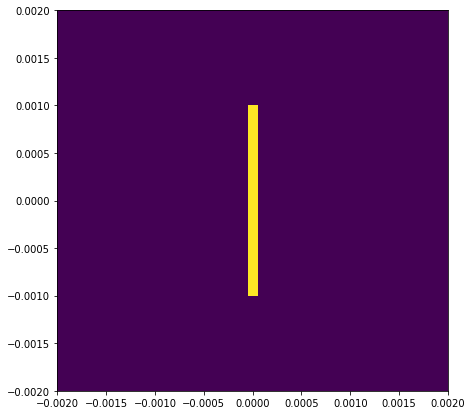

In [23]:
# PASO 2: DEFINIR LA RENDIJA (CONDICIÓN INICIAL DE LA LUZ)
# Para el primer ejemplo, lo haremos con una rendija

D = 0.1 * 1e-3 # Ancho de la rendija

x = np.linspace(-2,2,2000) * 1e-3 # Tamaño de la pantalla
xv,yv = np.meshgrid(x,x)          # Pantalla 

U0 = (np.abs(xv)<D/2) * (np.abs(yv)<10*D) # False en donde no hay luz y True donde sí hay
#print(U0)

U0 = U0.astype(float) # Convertir a números True -> 1 ; False -> 0
#print(U0)

plt.figure(figsize=(7,7))
plt.pcolormesh(xv,yv,U0)

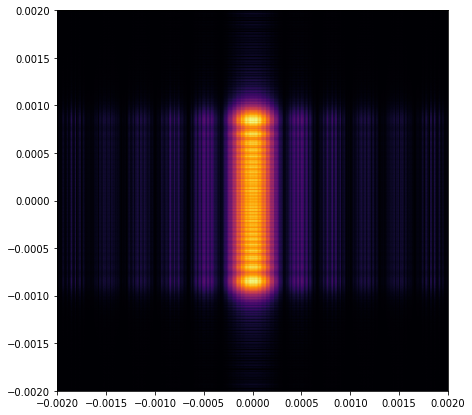

In [24]:
# PASO 3: HALLAR 'A' A PARTIR DE U0

A = fft2(U0) # Coeficientes A 
kx = fftfreq(len(x),np.diff(x)[0]) * 2 * np.pi # Muestreo de frecuencias 
kxv,kyv = np.meshgrid(kx,kx) # Pantalla pero en frecuencias

# PASO 4: CALCULAR U A UNA DISTANCIA z DE LA RENDIJA A PARTIR DE 'A'

k = 2 * np.pi / λ # Número de onda
z = 5 * 1e-2      # Distancia a la que se mide

U = ifft2(A * np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

plt.figure(figsize=(7,7))
plt.pcolormesh(xv,yv,np.abs(U),cmap="inferno")

<img src="MinimosRendija.png" width=600pt align="center"/>

Imagen tomada de [Hyperphysics](http://hyperphysics.phy-astr.gsu.edu/hbasees/phyopt/sinslit.html)

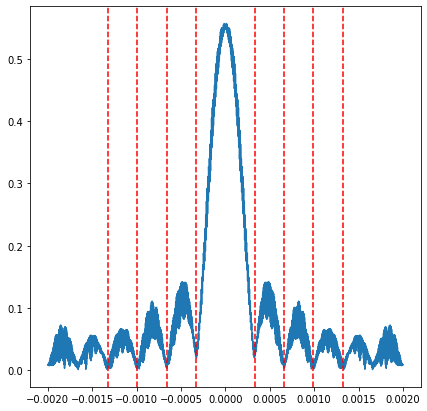

In [8]:
# AHORA PODEMOS COMPARAR LOS RESULTADOS DE LA SIMULACIÓN CON EL QUE SE OBTIENE EN DIFRACCIÓN DE FRAUNHOFER

U_medio = np.abs( U[ int(len(U)/2) , :] ) # Tomamos la sección central del patrón de difracción

m = np.arange(1,5,1) # Valores del entero m
x_min = m * λ * z  /  np.sqrt(D**2 - m**2 * λ**2)

plt.figure(figsize=(7,7))
plt.plot(x,U_medio)
for val in x_min:
    plt.axvline(val,ls='--',color='red')
    plt.axvline(-val,ls='--',color='red')  
  

In [9]:
# EL SIGUIENTE PASO ES VOLVERLO TODO UNA SOLA FUNCIÓN PARA USO MÁS GENERAL

def calcular_U(U0, xv, yv, λ, z):
    A = fft2(U0)
    kx = 2 * np.pi * fftfreq(len(x), np.diff(x)[0])
    kxv, kyv = np.meshgrid(kx,kx)
    k = 2*np.pi/λ
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

def graficar_U(xv,yv,U):
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xv,yv,np.abs(U),cmap="inferno")    

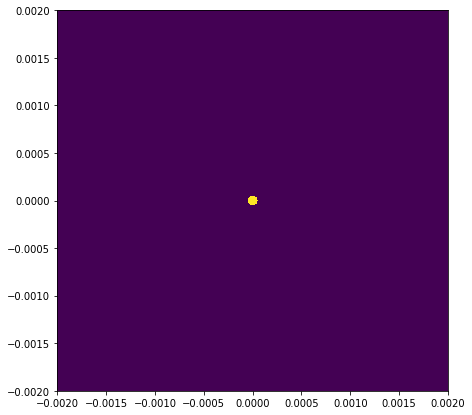

In [10]:
# Ahora podemos intentar con otras rendijas 
# PASO 1: CREAR LA RENDIJA, EN ESTE CASO UN CIRCULO

r = 0.05 * 1e-3  

x = np.linspace(-2,2,2000) * 1e-3 
xv, yv = np.meshgrid(x,x)

U0 = (np.abs(xv)**2 + np.abs(yv)**2 < r**2) 
U0 = U0.astype(float)

plt.figure(figsize=(7,7))
plt.pcolormesh(xv,yv,U0)

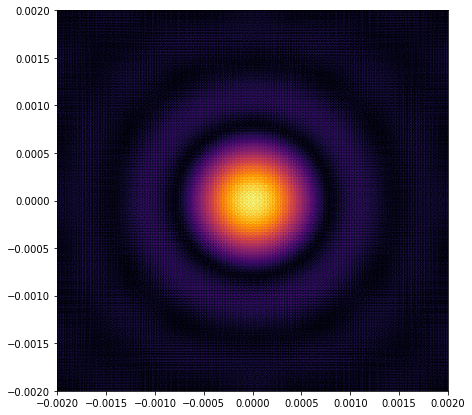

In [11]:
λ = 660 * 1e-9
z = 10 * 1e-2

U = calcular_U(U0,xv,yv,λ,z)

graficar_U(xv,yv,U)

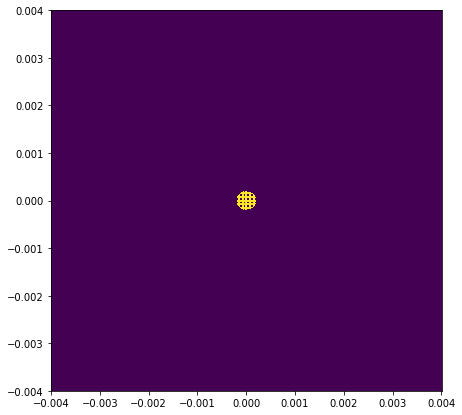

In [12]:
# INTENTEMOS ALGO MUCHO MÁS INTERESANTE AHORA, HAGAMOS PASAR LUZ BLANCA POR ALGUNA RENDIJA

x = np.linspace(-4,4,3500) * 1e-3 
xv, yv = np.meshgrid(x,x)

s = 0.1 * 1e-3
s2 = 1.5 * 1e-3 

U0 = ((np.abs(xv-0.5*s2)<0.2*s) * (np.abs(yv)<s2))
for i in np.arange(-1,1,0.05):
    U0 = U0 + ((np.abs(xv-i*s2)<0.2*s) * (np.abs(yv)<s2)) 
for i in np.arange(-1,1,0.05):
    U0 = U0 + ((np.abs(xv)<s2) * (np.abs(yv-i*s2)<0.2*s)) 

U0 = U0 * ( (xv**2 + yv**2 < 4*s**2))

U0 = U0.astype(float)

plt.figure(figsize=(7,7))
plt.pcolormesh(xv,yv,U0)
#plt.xlim([-0.001,0.001])
#plt.ylim([-0.001,0.001])

<img src="RGB.png" width=400pt align="center"/>

Imagen tomada de [pinclipart.com](https://www.pinclipart.com/downpngs/hximhR_additive-color-rgb-color-model-color-wheel-subtractive/)

In [13]:
# AHORA, CALCULAMOS POR INDEPENDIENTE LA DIFRACCIÓN DE CADA COLOR
λ1 = 645 * 1e-9 # Rojo
λ2 = 510 * 1e-9 # Verde
λ3 = 440 * 1e-9 # Azul

z = 25 * 1e-2 

U1 = calcular_U(U0, xv, yv, λ1, z) # Propagación del rojo
U2 = calcular_U(U0, xv, yv, λ2, z) # Propagación del verde
U3 = calcular_U(U0, xv, yv, λ3, z) # Propagación del azul

<img src="RGB Matrices.jpg" width=600pt align="center"/>

Imagen tomada de [Researchgate](https://www.researchgate.net/publication/282798184_The_project_is_based_on_emerging_field_Image_Processing_In_this_project_A_Graphical_User_Interface_has_been_designed_using_the_software_Labwindows_which_can_process_both_type_of_Real_time_Image_Proces/figures?lo=1)


In [27]:
U = np.zeros( (U1.shape[0],U1.shape[1],3)) # Imagen vacía
U[:,:,0] = np.abs(U1) # Parte roja de la imagen 
U[:,:,1] = np.abs(U2) # Parte verde de la imagen
U[:,:,2] = np.abs(U3) # Parte azul de la imagen 

umbral = np.max(U)
U = U/umbral

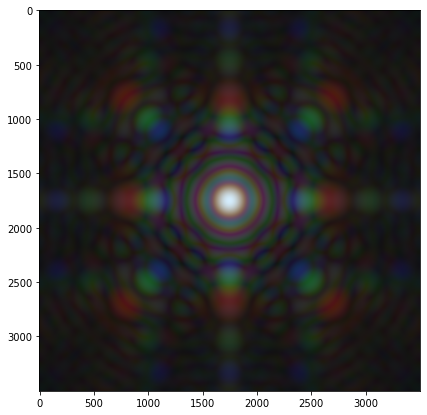

In [28]:
plt.figure(figsize=(7,7))
plt.imshow(np.sqrt(U))

In [16]:
def U_blanco(xv,yv,U0,z):
    λ1 = 645 * 1e-9 # Rojo
    λ2 = 510 * 1e-9 # Verde
    λ3 = 440 * 1e-9 # Azul

    U1 = calcular_U(U0, xv, yv, λ1, z) # Propagación del rojo
    U2 = calcular_U(U0, xv, yv, λ2, z) # Propagación del verde
    U3 = calcular_U(U0, xv, yv, λ3, z) # Propagación del azul

    U = np.zeros((U1.shape[0],U1.shape[1],3)) # Imagen vacía
    U[:,:,0] = np.abs(U1) # Parte roja de la imagen 
    U[:,:,1] = np.abs(U2) # Parte verde de la imagen
    U[:,:,2] = np.abs(U3) # Parte azul de la imagen 

    U = np.sqrt(U)
    umbral = np.max(U)
    U = U/umbral

    plt.figure(figsize=(7,7))
    plt.imshow(U)

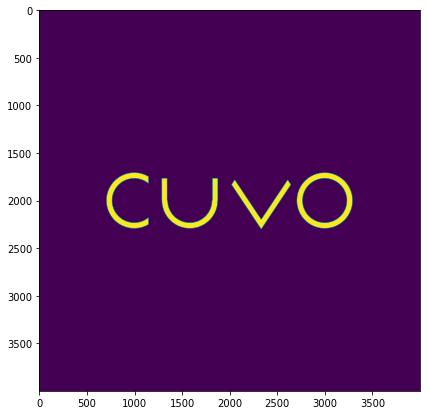

In [17]:
# PARA TERMINAR, JUGUEMOS UN POCO

x = np.linspace(-6,6,4000) * 1e-3 
xv, yv = np.meshgrid(x,x)

s = 0.7 * 1e-3
xo = 3.0 * 1e-3
y_v = 0.1 * 1e-3
x_v = 1 * 1e-3
xu = 1.25 * 1e-3

U0 = ( ~((xv-xo)**2 + yv**2 < s**2) * ((xv-xo)**2 + yv**2 < (1.25*s)**2) )
U0 = U0 + ( ~(1.5*np.abs(xv-x_v) + np.abs(yv + 8*y_v) < 2*s) * (1.5*np.abs(xv-x_v) + np.abs(yv + 5*y_v) < 2*s))
U0 = U0 + (~((xv+xo)**2 + yv**2 < s**2) * ((xv+xo)**2 + yv**2 < (1.25*s)**2) * (xv<-0.85*xo))
U0 = U0 + (~((xv+xu)**2 + yv**2 < s**2) * ((xv+xu)**2 + yv**2 < (1.25*s)**2) * (yv > 0) )
U0 = U0 + ( (np.abs(xv+xu+1.14*s)<0.12*s) * (np.abs(yv)<s) * (yv<0) ) + ( (np.abs(xv+xu-1.14*s)<0.12*s) * (np.abs(yv)<s) * (yv<0) )

U0 = U0.astype(float)

plt.figure(figsize=(7,7))
plt.imshow(U0)

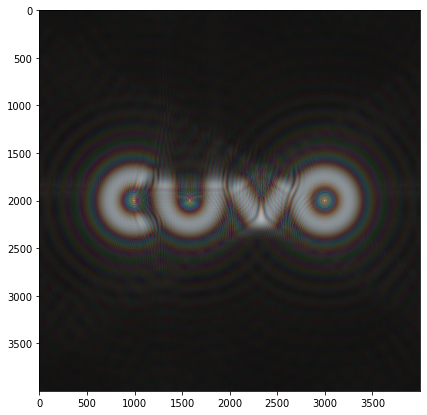

In [18]:
U_blanco(xv,yv,U0,z=15*1e-2)